In [1]:
pwd

'C:\\Users\\HP'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, r2_score, precision_score, recall_score, f1_score

In [3]:
ccp = pd.read_csv(r'D:\Users\HP\Codsoft Tasks Datasets\CustomerChurnPrediction.csv\Churn_Modelling.csv')

In [4]:
ccp.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
ccp.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [6]:
ccp.shape

(10000, 14)

In [7]:
ccp.size

140000

In [8]:
ccp.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
ccp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
ccp.isnull().values.any()

False

In [11]:
ccp.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [12]:
ccp.index

RangeIndex(start=0, stop=10000, step=1)

In [13]:
ccp.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [14]:
ccp.axes

[RangeIndex(start=0, stop=10000, step=1),
 Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
        'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
        'IsActiveMember', 'EstimatedSalary', 'Exited'],
       dtype='object')]

In [15]:
ccp.iloc[0:4]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0


In [16]:
ccp.loc[:,"CustomerId"]

0       15634602
1       15647311
2       15619304
3       15701354
4       15737888
          ...   
9995    15606229
9996    15569892
9997    15584532
9998    15682355
9999    15628319
Name: CustomerId, Length: 10000, dtype: int64

# Data Visualization

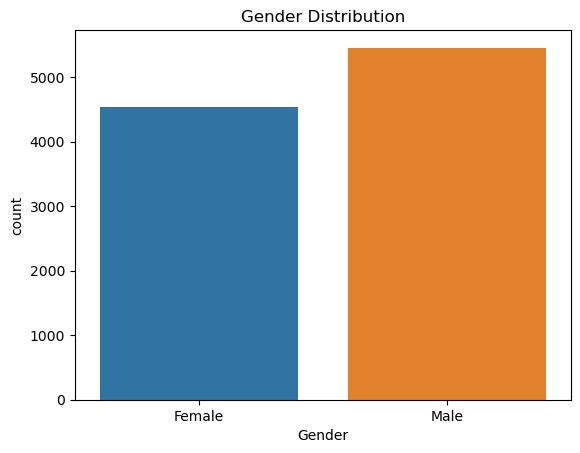

In [17]:
sns.countplot(x ='Gender', data = ccp)
plt.title('Gender Distribution')
plt.show()

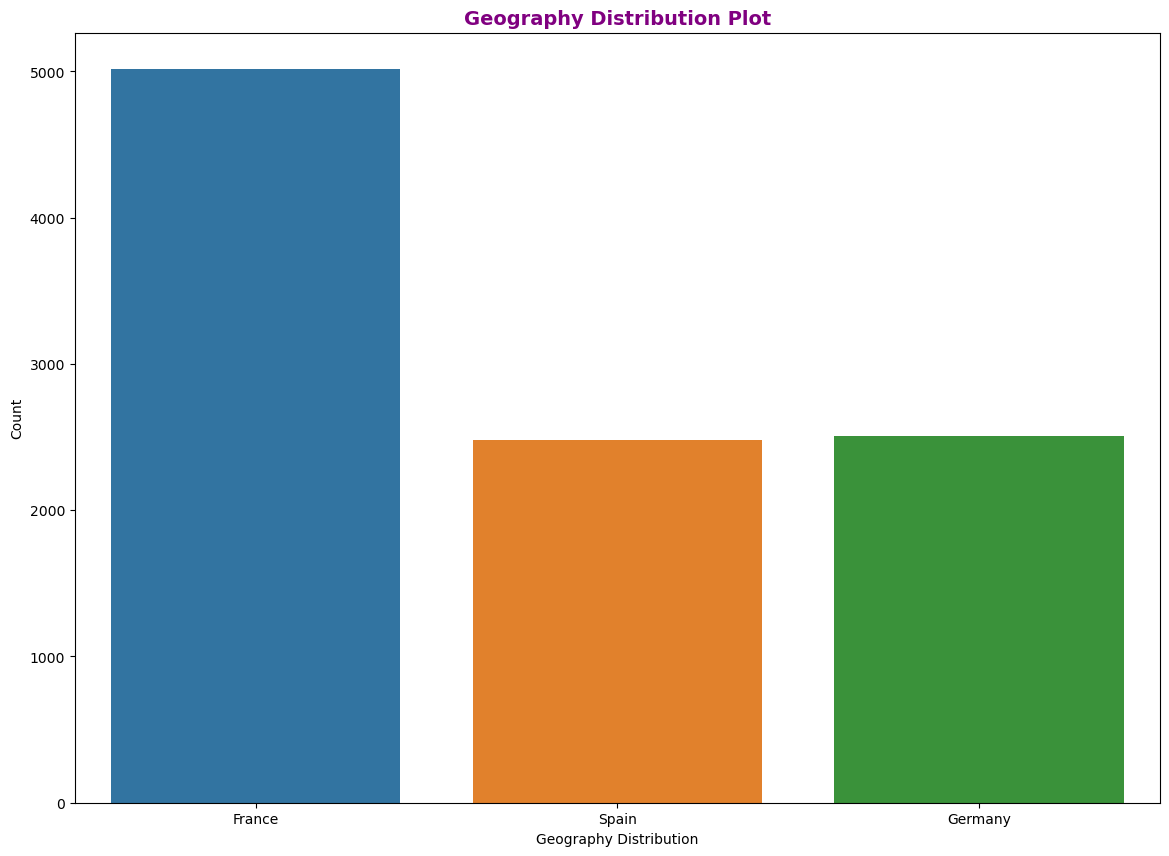

In [18]:
plt.figure(figsize=(14,10))
sns.countplot(x='Geography', data = ccp)
plt.xlabel('Geography Distribution')
plt.ylabel('Count')
plt.title('Geography Distribution Plot', fontsize = 14, fontweight="bold", color="purple")
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


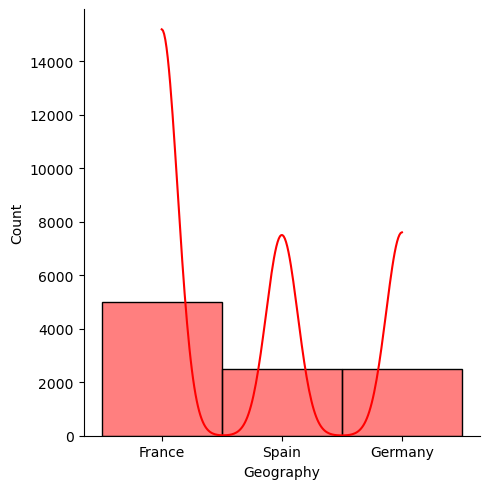

In [19]:
sns.displot(ccp.Geography, kde = True, color = "red")

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


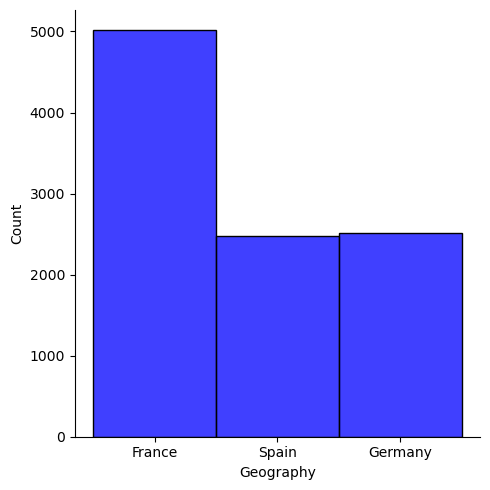

In [20]:
sns.displot(ccp.Geography, color = "blue")

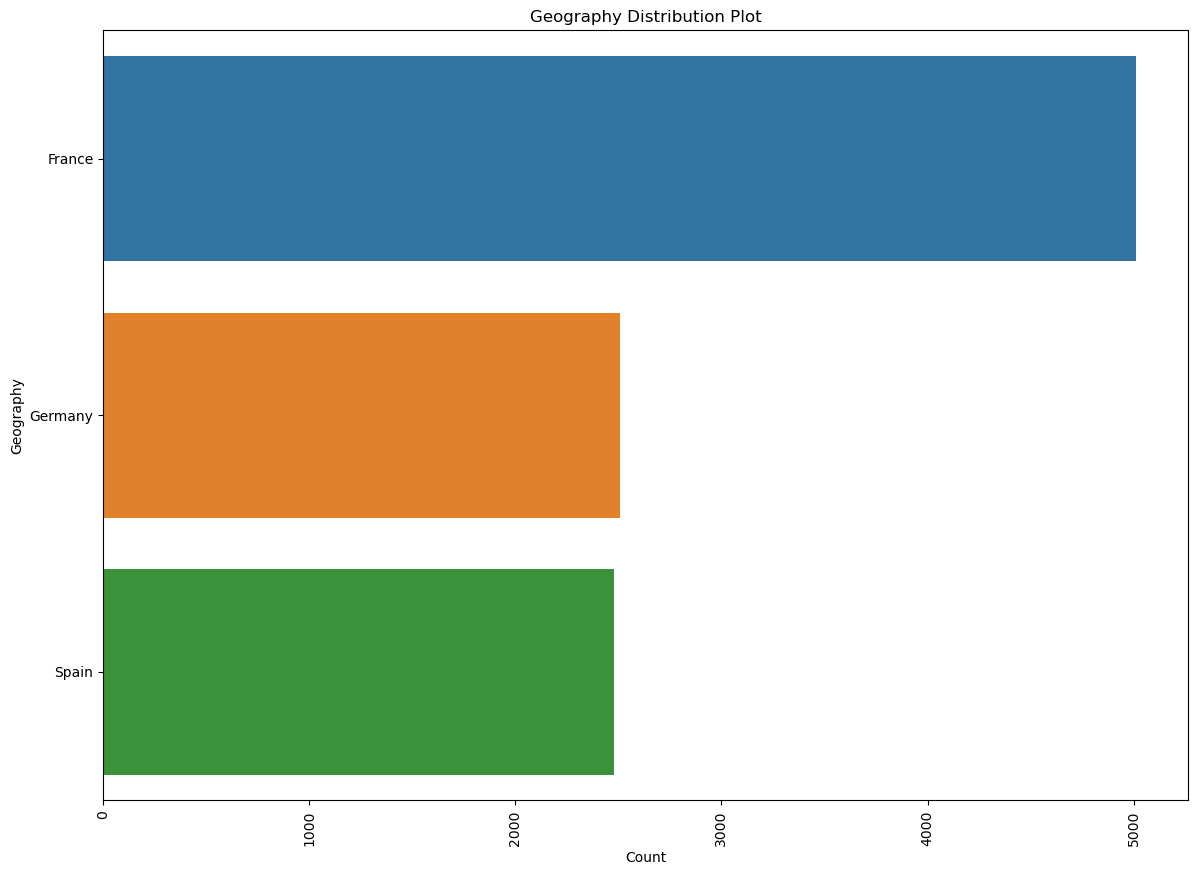

In [21]:
plt.figure(figsize = (14,10))
count1 = ccp.Geography.value_counts()
sns.barplot(x = count1, y = count1.index, orient = 'h')
plt.xlabel('Count')
plt.ylabel('Geography')
plt.title('Geography Distribution Plot')
plt.xticks(rotation=90)
plt.show()

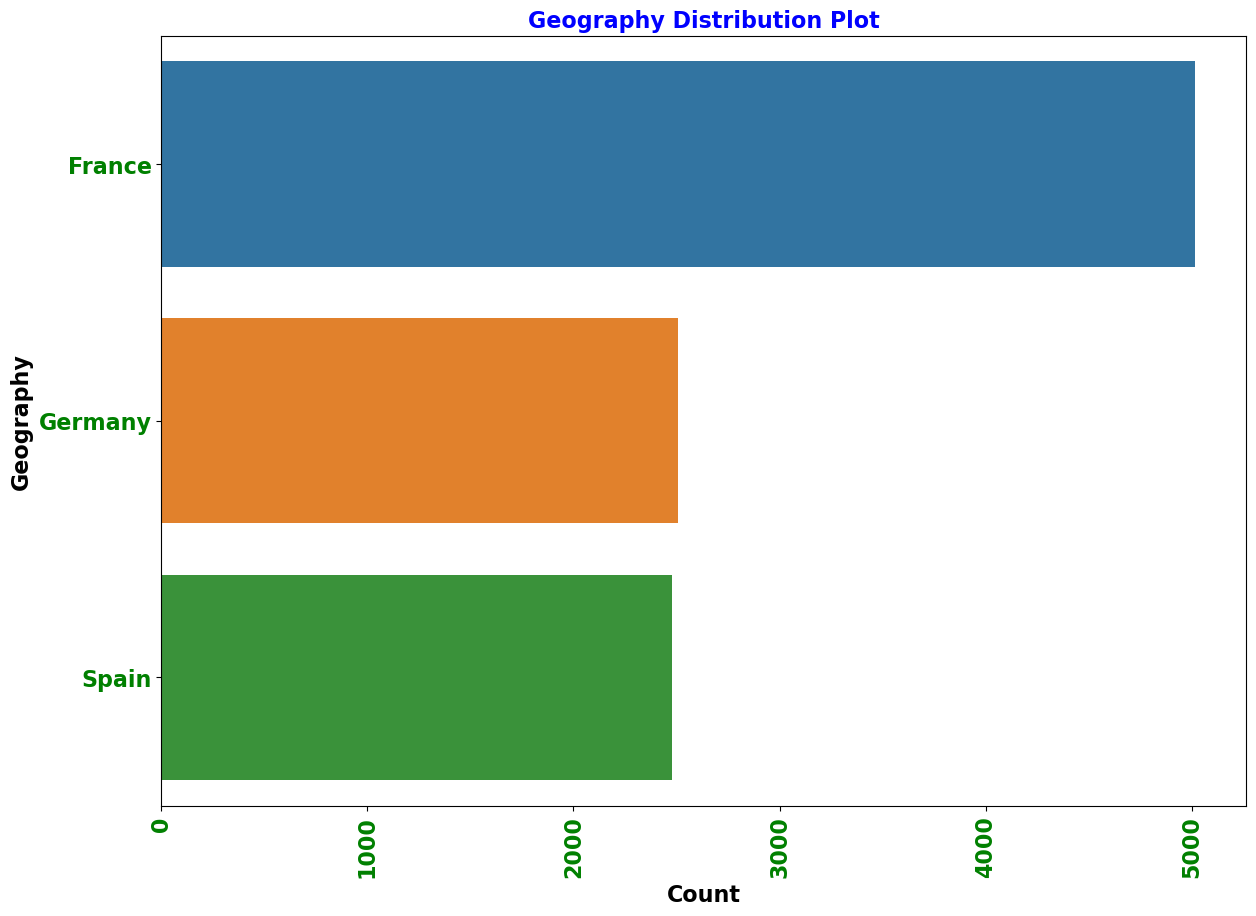

In [22]:
plt.figure(figsize = (14,10))
count1 = ccp.Geography.value_counts()
sns.barplot(x = count1, y = count1.index, orient = 'h')
plt.xlabel('Count', fontsize = 16, fontweight = 'bold')
plt.ylabel('Geography', fontsize = 16, fontweight = 'bold')
plt.title('Geography Distribution Plot', fontsize = 16, fontweight = 'bold', color = 'blue')
plt.xticks(rotation=90, fontsize = 16, fontweight = 'bold', color = 'green')
plt.yticks(fontsize = 16, fontweight = 'bold', color = 'green')
plt.show()

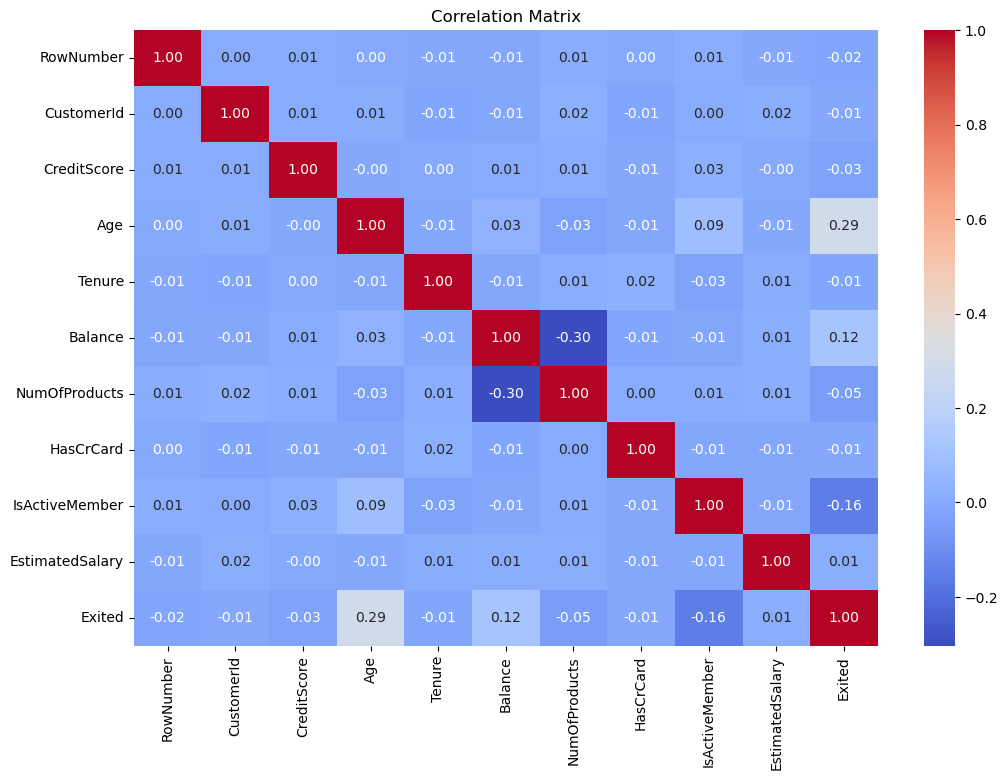

In [23]:
non_numeric_columns = ccp.select_dtypes(exclude=[np.number]).columns
ccp_numeric = ccp.drop(columns=non_numeric_columns)

correlation_matrix = ccp_numeric.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Preprocess the Data

In [24]:
ccp.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [25]:
ccp.drop(labels = ["RowNumber", "CustomerId", "Surname"], axis = 1, inplace = True)

In [26]:
ccp = pd.get_dummies(ccp, drop_first = True)

In [27]:
ccp.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [28]:
X = ccp.drop("Exited", axis = 1)
Y = ccp["Exited"]

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression Model

In [31]:
tlr_model = LogisticRegression()

In [32]:
tlr_model.fit(X_train, Y_train)

LogisticRegression()

In [33]:
tlr_predictions = tlr_model.predict(X_test)

In [34]:
print("Logistic Regression Model: ")
print(confusion_matrix(Y_test, tlr_predictions))
print(classification_report(Y_test, tlr_predictions))
print("Accuracy: ", accuracy_score(Y_test, tlr_predictions))
print("r2_Score: ", r2_score(Y_test, tlr_predictions))
print("Precision_Score", precision_score(Y_test, tlr_predictions))
print("Recall_Score: ", recall_score(Y_test, tlr_predictions))
print("f1 _score", f1_score(Y_test, tlr_predictions))

Logistic Regression Model: 
[[1543   64]
 [ 314   79]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

Accuracy:  0.811
r2_Score:  -0.19705296959390473
Precision_Score 0.5524475524475524
Recall_Score:  0.2010178117048346
f1 _score 0.2947761194029851


# Train Random Forest Model

In [35]:
trf_model = RandomForestClassifier(n_estimators= 1000, n_jobs= -1, random_state = 42)

In [36]:
trf_model.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [37]:
trf_predictions = trf_model.predict(X_test)

In [38]:
print("Random Forest Model: ")
print(confusion_matrix(Y_test, tlr_predictions))
print(classification_report(Y_test, tlr_predictions))
print("Accuracy: ", accuracy_score(Y_test, tlr_predictions))
print("r2_Score: ", r2_score(Y_test, tlr_predictions))
print("Precision_Score", precision_score(Y_test, tlr_predictions))
print("Recall_Score: ", recall_score(Y_test, tlr_predictions))
print("f1 _score", f1_score(Y_test, tlr_predictions))

Random Forest Model: 
[[1543   64]
 [ 314   79]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

Accuracy:  0.811
r2_Score:  -0.19705296959390473
Precision_Score 0.5524475524475524
Recall_Score:  0.2010178117048346
f1 _score 0.2947761194029851


# Train Gradient Boosting Model 

In [39]:
tgb_model = GradientBoostingClassifier(n_estimators= 1000, learning_rate = 0.2, max_depth = 1, random_state = 42)

In [40]:
tgb_model.fit(X_train,Y_train)

GradientBoostingClassifier(learning_rate=0.2, max_depth=1, n_estimators=1000,
                           random_state=42)

In [41]:
tgb_predictions = tgb_model.predict(X_test)

In [42]:
print("Gradient Boosting Model: ")
print(confusion_matrix(Y_test, tlr_predictions))
print(classification_report(Y_test, tlr_predictions))
print("Accuracy: ", accuracy_score(Y_test, tlr_predictions))
print("r2_Score: ", r2_score(Y_test, tlr_predictions))
print("Precision_Score", precision_score(Y_test, tlr_predictions))
print("Recall_Score: ", recall_score(Y_test, tlr_predictions))
print("f1 _score", f1_score(Y_test, tlr_predictions))

Gradient Boosting Model: 
[[1543   64]
 [ 314   79]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

Accuracy:  0.811
r2_Score:  -0.19705296959390473
Precision_Score 0.5524475524475524
Recall_Score:  0.2010178117048346
f1 _score 0.2947761194029851
